In [1]:
#2022/4/11
import numpy as np
import matplotlib.pyplot as plt
import copy        

In [2]:
# Aluthge, Duggal, Mean Transformation
class Transformation():
    
    def __init__(self):
        
        self.color_dict={0:"magenta",1:"dimgray",2:"cyan"}
        self.type_dict={0:"Aluthge",1:"Duggal",2:"Mean"}
        self.type_dict_2= {v: k for k, v in self.type_dict.items()}

    def Epoch(self,T,Type,check_u=1): # one iteration 
        
        w,sigma,v_h=np.linalg.svd(T)    
        sigma=np.diag(sigma) 
        v=v_h.H
        
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h 
        sigma_pinv=np.linalg.pinv(sigma)
        
        if self.check_u==1:
            u=w@sigma@sigma_pinv@v_h #check definition of u
        else :
            u=w@v_h
        
        T_abs=v@sigma@v_h
        #Compute each Transformation
        T_tilda=sigma_hat@u@sigma_hat
        T_duggal=T_abs@u
        T_mean=1/2*(T+T_duggal)
        
        if Type=="Aluthge":
            output=T_tilda
        elif Type=="Duggal":
            output=T_duggal
        else :
            output=T_mean
        
        return output #one epoch output
             
    def Transform(self,T,n=1,check_u=1): # n : iteration count 
        self.check_u=check_u
        Type_list=["Aluthge","Duggal","Mean"]
        
        self.T=T
        self.n=n
        self.total_info=[]

        for j in Type_list:
            before=copy.deepcopy(self.T)
        
            cal_info=[T]
        
            for i in range(self.n):
                
                after=self.Epoch(before,Type=j)
                cal_info.append(after)
                before=after
            
            self.total_info.append(cal_info)
        
        self.Aluthge_info=self.total_info[0]
        self.Duggal_info=self.total_info[1]
        self.Mean_info=self.total_info[2]
        
    def Normal_calculator(self): 
        self.norm_info=[[],[],[]] #list of Frobenius norm of each transformation output matrix
        self.normal_info=[[],[],[]] #list of Frobenius norm of each transformation output matrix
        
        for i in range(3):
            for j in self.total_info[i]:
                norm=np.linalg.norm(j)
                distance_matrix=np.abs(j@j.H-j.H@j)
                distance=np.linalg.norm(distance_matrix)
                self.normal_info[i].append(distance)
                self.norm_info[i].append(norm)
    
    
    def Normal_plot(self): # plot that dipicts Frobenius norm of T(T^*)-(T^*)T

        self.total_fig, self.total_ax=plt.subplots(1,1)
        
        for i in range(3):
            self.total_ax.plot(range(self.n+1),self.normal_info[i],color=self.color_dict[i],\
                               label=self.type_dict[i],alpha=0.5,marker="o",linestyle="dashed")
            self.total_ax.set_title("Normal Characteristic")
        
        self.total_fig.set_size_inches((16,4))
        self.total_ax.grid(axis='x', color='0.95',linestyle="--")
        self.total_ax.legend(title="Type")

        
    def Process(self,k,Type):
        
        M=self.total_info[self.type_dict_2[Type]][k-1]
        print("Input\n",np.round(M,4),"\n")
        
        w,sigma,v_h=np.linalg.svd(M)   
        sigma=np.diag(sigma) 
        v=v_h.H
                
        print("W\n",np.round(w,4),"\n")
        print("Sigma\n",np.round(sigma,4),"\n")
        print("V_h\n",np.round(v_h,4),"\n")
        print("W\Sigma V^*\n",np.round(w@sigma@v_h,4),"\n")
        print("WV^*\n",np.round(w@v_h,4),"\n")
        print("V\n",v,"\n")
        
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h
        sigma_pinv=np.linalg.pinv(sigma)
        
        if self.check_u==1:
            
            u=w@sigma@sigma_pinv@v_h #check definition of u
        else :
            u=w@v_h
        
        print("U=W\Sigma\Sigma_pinv V^*\n",np.round(u,4),"\n")
        
        T_abs=v@sigma@v_h
        
        print("|T|\n",np.round(T_abs,4),"\n")
        
        print("U|T|\n",np.round(u@T_abs,4),"\n")

        if Type=="Aluthge":
            T_tilda=sigma_hat@w@v_h@sigma_hat
            print("T_tilda(a)\n",np.round(T_tilda,4),"\n")
        
        elif Type=="Duggal":
        
            T_duggal=T_abs@u
            print("T_duggal(a)\n",np.round(T_duggal,4),"\n")
        else :
            T_abs@u
            T_mean=(M+T_abs@u)/2
            
            print("|T|U",np.round(T_abs@u,4),"\n")
            print("T_mean(a)\n",np.round(T_mean,4),"\n")
        
        print("result from our class(b)\n",np.round(self.total_info[self.type_dict_2[Type]][k],4))
        print("If a!=b, Error.. ; If that happens, please email us")
        
        
        

### API
#### 1. Transformation(T,n) : iterate n times for each transformations.(Aluthge, Duggal and Mean).
    
    input:
        T : matrix (numpy.Matrix)
        n : number of iteration
     
   The output is saved as a list in the following format.
     
   Transfomation.total_info=[Transfomation.Aluthge_info, Transfomation.Duggal_info, Transfomation.Mean_info]


#### 2. Transfomation.Normal_calculator() : Norm and Normality Calculation Built-in Functions.

   Transfomation.norm_info : A list in which the norm of the Transformations is stored.
   
   Transfomation.normal_info : A list in which normal characteristic - $|T^{*}T-TT^{*}| - $ is stored.
   
#### 3. Transformation.Process(k,Type) : You can check the calculation process of a specific part.
    
    input:
        k : purpose number of repetitions (1<=k<=n)
        Type : "Aluthge" or "Duggal" or "Mean"
    
   Lists information from the implementation.

#### 4. Transformation.Plot() : plotting of normal characteristic.
   
   axis X : number of iteration(n)
   
   axis Y : normal characteristic for each transformations.

    


*****
see example below.

### Example 

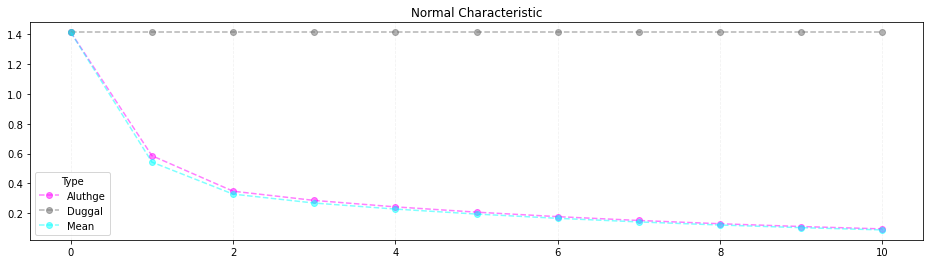

In [3]:
#ex1 
#invertible matrix
T = np.matrix([[0,0,1],[1,1,0],[1,-1,0]])

Ex_1=Transformation() 

Ex_1.Transform(T,n=10) 

Ex_1.Normal_calculator() 

Ex_1.Normal_plot() 

In [4]:

s=np.matrix([np.sqrt(2),0,0,0,1.2071,0,0,0,1.2071]).reshape(3,3)

Check=Transformation() 

Check.Transform(s,n=10) 

Check.Normal_calculator()

Check.Process(k=2, Type="Aluthge")

Input
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

W
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

Sigma
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

V_h
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

W\Sigma V^*
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

WV^*
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

V
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

U=W\Sigma\Sigma_pinv V^*
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

|T|
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

U|T|
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

T_tilda(a)
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

result from our class(b)
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]]
If a!=b, Error.. ; If that happens, please email us


In [5]:
#Ex_1.total_info

#Ex_1.Aluthge_info

#Ex_1.Duggal_info

#Ex_1.Mean_info

#Ex_1.norm_info

#Ex_1.normal_info

Ex_1.Process(k=2, Type="Mean")


Input
 [[ 0.      0.      1.2071]
 [ 1.      1.     -0.    ]
 [ 0.8536 -0.8536 -0.    ]] 

W
 [[ 0. -1.  0.]
 [-1.  0. -0.]
 [-0.  0.  1.]] 

Sigma
 [[1.4142 0.     0.    ]
 [0.     1.2071 0.    ]
 [0.     0.     1.2071]] 

V_h
 [[-0.7071 -0.7071 -0.    ]
 [-0.     -0.     -1.    ]
 [ 0.7071 -0.7071 -0.    ]] 

W\Sigma V^*
 [[ 0.     -0.      1.2071]
 [ 1.      1.     -0.    ]
 [ 0.8536 -0.8536 -0.    ]] 

WV^*
 [[ 0.     -0.      1.    ]
 [ 0.7071  0.7071 -0.    ]
 [ 0.7071 -0.7071 -0.    ]] 

V
 [[-0.70710678 -0.          0.70710678]
 [-0.70710678 -0.         -0.70710678]
 [-0.         -1.         -0.        ]] 

U=W\Sigma\Sigma_pinv V^*
 [[ 0.     -0.      1.    ]
 [ 0.7071  0.7071 -0.    ]
 [ 0.7071 -0.7071 -0.    ]] 

|T|
 [[1.3107 0.1036 0.    ]
 [0.1036 1.3107 0.    ]
 [0.     0.     1.2071]] 

U|T|
 [[ 0.     -0.      1.2071]
 [ 1.      1.     -0.    ]
 [ 0.8536 -0.8536 -0.    ]] 

|T|U [[ 0.0732  0.0732  1.3107]
 [ 0.9268  0.9268  0.1036]
 [ 0.8536 -0.8536 -0.    ]] 

T_mean(a

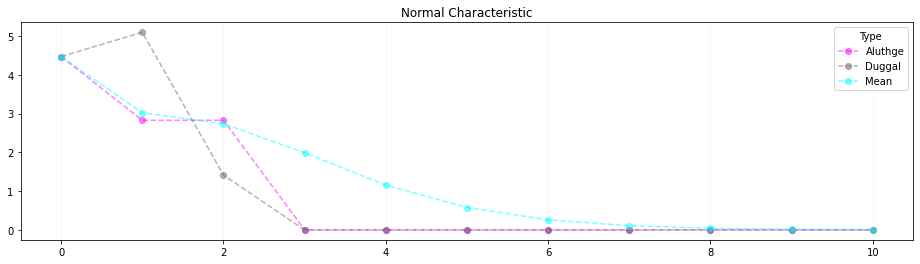

In [6]:
#ex2 코드
#non-invertible matrix
T = np.matrix([[0,1,0,0],[0,0,2,0],[0,0,0,1],[0,0,0,0]])

Ex_2=Transformation()

Ex_2.Transform(T,10)

Ex_2.Normal_calculator()

Ex_2.Normal_plot()


In [7]:
Ex_2.total_info

#Ex_2.Aluthge_info

#Ex_2.Duggal_info

#Ex_2.Mean_info

#Ex_2.norm_info

#Ex_2.normal_info

#Ex_2.Process(k=1, Type="Aluthge")



[[matrix([[0, 1, 0, 0],
          [0, 0, 2, 0],
          [0, 0, 0, 1],
          [0, 0, 0, 0]]),
  matrix([[0.        , 0.        , 0.        , 0.        ],
          [0.        , 0.        , 1.41421356, 0.        ],
          [0.        , 0.        , 0.        , 1.41421356],
          [0.        , 0.        , 0.        , 0.        ]]),
  matrix([[0.        , 0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        , 1.41421356],
          [0.        , 0.        , 0.        , 0.        ]]),
  matrix([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]),
  matrix([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]),
  matrix([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]),
  matrix([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0

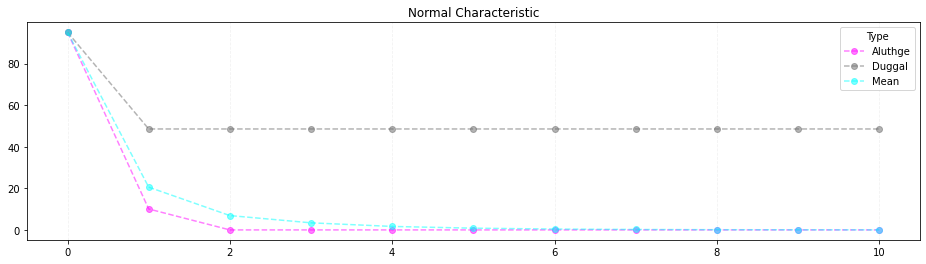

In [8]:
#ex3 코드
#non-invertible matrix
T = np.matrix([[2,1,-4],[-4,-1,6],[-2,2,-2]])

Ex_3=Transformation()

Ex_3.Transform(T,10)

Ex_3.Normal_calculator()

Ex_3.Normal_plot()

In [9]:
Ex_3.total_info

#Ex_3.Aluthge_info

#Ex_3.Duggal_info

#Ex_3.Mean_info

#Ex_3.norm_info

#Ex_3.normal_info

#Ex_3.Process(k=1, Type="Aluthge")



[[matrix([[ 2,  1, -4],
          [-4, -1,  6],
          [-2,  2, -2]]),
  matrix([[ 2.80491863, -0.00703272, -2.79085319],
          [-0.32897652, -1.18756376,  2.70410404],
          [-2.14696562,  2.38216025, -2.61735487]]),
  matrix([[ 2.8020383 , -0.17816735, -2.4457036 ],
          [-0.17816735, -1.17828144,  2.53473023],
          [-2.4457036 ,  2.53473023, -2.62375686]]),
  matrix([[ 2.8020383 , -0.17816735, -2.4457036 ],
          [-0.17816735, -1.17828144,  2.53473023],
          [-2.4457036 ,  2.53473023, -2.62375686]]),
  matrix([[ 2.8020383 , -0.17816735, -2.4457036 ],
          [-0.17816735, -1.17828144,  2.53473023],
          [-2.4457036 ,  2.53473023, -2.62375686]]),
  matrix([[ 2.8020383 , -0.17816735, -2.4457036 ],
          [-0.17816735, -1.17828144,  2.53473023],
          [-2.4457036 ,  2.53473023, -2.62375686]]),
  matrix([[ 2.8020383 , -0.17816735, -2.4457036 ],
          [-0.17816735, -1.17828144,  2.53473023],
          [-2.4457036 ,  2.53473023, -2.62375686]

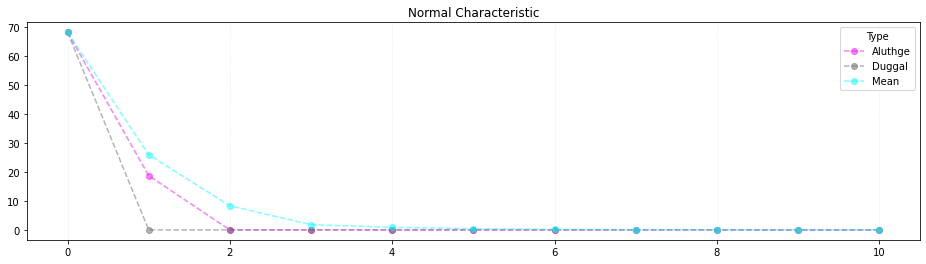

In [10]:
#ex4 코드
#non-invertible matrix

T = np.matrix([[-5,0,2],[1,-2,3],[6,-2,1]])

Ex_4=Transformation()

Ex_4.Transform(T,10)

Ex_4.Normal_calculator()

Ex_4.Normal_plot()


In [11]:
Ex_4.total_info

#Ex_4.Aluthge_info

#Ex_4.Duggal_info

#Ex_4.Mean_info

#Ex_4.norm_info

#Ex_4.normal_info

#Ex_4.Process(k=1, Type="Aluthge")



[[matrix([[-5,  0,  2],
          [ 1, -2,  3],
          [ 6, -2,  1]]),
  matrix([[-5.44644073e+00,  2.22188011e-01,  1.80085667e+00],
          [-6.94934511e-01,  1.64354462e-01, -1.42878174e-03],
          [ 3.35996497e+00, -3.68277799e-01, -7.17913729e-01]]),
  matrix([[-5.66550162,  0.04775471,  2.18501764],
          [ 0.04775471,  0.13034331, -0.24068551],
          [ 2.18501764, -0.24068551, -0.46484169]]),
  matrix([[-5.66550162,  0.04775471,  2.18501764],
          [ 0.04775471,  0.13034331, -0.24068551],
          [ 2.18501764, -0.24068551, -0.46484169]]),
  matrix([[-5.66550162,  0.04775471,  2.18501764],
          [ 0.04775471,  0.13034331, -0.24068551],
          [ 2.18501764, -0.24068551, -0.46484169]]),
  matrix([[-5.66550162,  0.04775471,  2.18501764],
          [ 0.04775471,  0.13034331, -0.24068551],
          [ 2.18501764, -0.24068551, -0.46484169]]),
  matrix([[-5.66550162,  0.04775471,  2.18501764],
          [ 0.04775471,  0.13034331, -0.24068551],
          [ 2

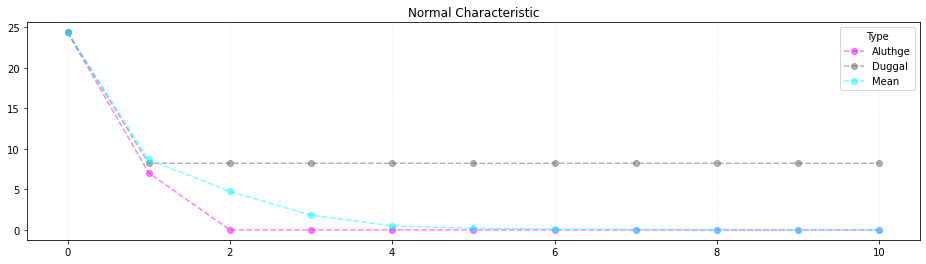

In [12]:
#ex5 코드
#non-invertible matrix
T = np.matrix([[0,2,-1],[3,-2,1],[3,2,-1]])

Ex_5=Transformation()

Ex_5.Transform(T,10)

Ex_5.Normal_calculator()

Ex_5.Normal_plot()

In [13]:
Ex_5.total_info

#Ex_5.Aluthge_info

#Ex_5.Duggal_info

#Ex_5.Mean_info

#Ex_5.norm_info

#Ex_5.normal_info

#Ex_5.Process(k=1, Type="Aluthge")



[[matrix([[ 0,  2, -1],
          [ 3, -2,  1],
          [ 3,  2, -1]]),
  matrix([[ 0.        ,  2.09327028, -1.04663514],
          [ 1.14653135, -2.4       ,  1.2       ],
          [-0.57326567,  1.2       , -0.6       ]]),
  matrix([[ 0.10596702,  1.46174415, -0.73087207],
          [ 1.46174415, -2.48477361,  1.24238681],
          [-0.73087207,  1.24238681, -0.6211934 ]]),
  matrix([[ 0.10596702,  1.46174415, -0.73087207],
          [ 1.46174415, -2.48477361,  1.24238681],
          [-0.73087207,  1.24238681, -0.6211934 ]]),
  matrix([[ 0.10596702,  1.46174415, -0.73087207],
          [ 1.46174415, -2.48477361,  1.24238681],
          [-0.73087207,  1.24238681, -0.6211934 ]]),
  matrix([[ 0.10596702,  1.46174415, -0.73087207],
          [ 1.46174415, -2.48477361,  1.24238681],
          [-0.73087207,  1.24238681, -0.6211934 ]]),
  matrix([[ 0.10596702,  1.46174415, -0.73087207],
          [ 1.46174415, -2.48477361,  1.24238681],
          [-0.73087207,  1.24238681, -0.6211934 ]

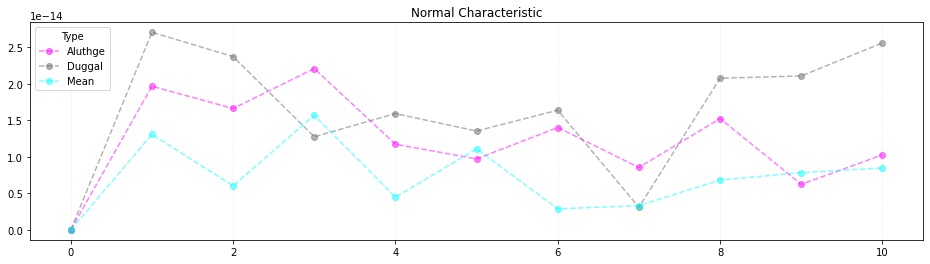

In [14]:
#ex6 코드
#normal,invertable matrix
T = np.matrix([[1j,-2-3j],[2-3j,0]])

Ex_6=Transformation()

Ex_6.Transform(T,10)

Ex_6.Normal_calculator()

Ex_6.Normal_plot()

#scale : 1e-14

In [15]:
Ex_6.total_info

#Ex_6.Aluthge_info

#Ex_6.Duggal_info

#Ex_6.Mean_info

#Ex_6.norm_info

#Ex_6.normal_info

#Ex_6.Process(k=1, Type="Aluthge")



[[matrix([[ 0.+1.j, -2.-3.j],
          [ 2.-3.j,  0.+0.j]]),
  matrix([[-6.13259698e-16+1.00000000e+00j,
           -2.00000000e+00-3.00000000e+00j],
          [ 2.00000000e+00-3.00000000e+00j,
            1.40518963e-15+5.77283327e-16j]]),
  matrix([[-1.24538174e-16+1.0000000e+00j, -2.00000000e+00-3.0000000e+00j],
          [ 2.00000000e+00-3.0000000e+00j,  1.69619172e-15+1.7478177e-15j]]),
  matrix([[ 5.77117990e-17+1.00000000e+00j,
           -2.00000000e+00-3.00000000e+00j],
          [ 2.00000000e+00-3.00000000e+00j,
            2.49213355e-15+4.94043693e-16j]]),
  matrix([[ 1.42994656e-15+1.00000000e+00j,
           -2.00000000e+00-3.00000000e+00j],
          [ 2.00000000e+00-3.00000000e+00j,
            4.84012204e-16+1.67188842e-15j]]),
  matrix([[ 1.09393348e-15+1.00000000e+00j,
           -2.00000000e+00-3.00000000e+00j],
          [ 2.00000000e+00-3.00000000e+00j,
            4.74860365e-16+2.15355126e-15j]]),
  matrix([[ 4.79738203e-16+1.0000000e+00j, -2.00000000e+00-3.000

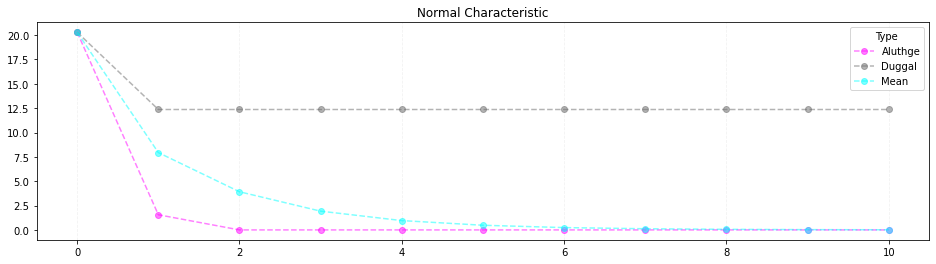

In [36]:
#ex7 코드
#non-invertable matrix
T = np.matrix([[1,2,0],[3,-1,2],[-2,3,-2]])

Ex_7=Transformation()

Ex_7.Transform(T,10,check_u=1)

Ex_7.Normal_calculator()

Ex_7.Normal_plot()


In [35]:
Ex_7.total_info

#Ex_7.Aluthge_info

#Ex_7.Duggal_info

#Ex_7.Mean_info

#Ex_7.norm_info

#Ex_7.normal_info

#Ex_7.Process(k=1, Type="Aluthge")


[[matrix([[ 1,  2,  0],
          [ 3, -1,  2],
          [-2,  3, -2]]),
  matrix([[ 0.25842443,  3.04672338, -0.72282129],
          [ 2.92281052, -1.2649305 ,  2.03158614],
          [-0.68741762,  2.10239351, -0.99349393]]),
  matrix([[ 0.26540142,  2.98222996, -0.70040774],
          [ 2.98222996, -1.27425308,  2.0682037 ],
          [-0.70040774,  2.0682037 , -0.99114833]]),
  matrix([[ 0.26540142,  2.98222996, -0.70040774],
          [ 2.98222996, -1.27425308,  2.0682037 ],
          [-0.70040774,  2.0682037 , -0.99114833]]),
  matrix([[ 0.26540142,  2.98222996, -0.70040774],
          [ 2.98222996, -1.27425308,  2.0682037 ],
          [-0.70040774,  2.0682037 , -0.99114833]]),
  matrix([[ 0.26540142,  2.98222996, -0.70040774],
          [ 2.98222996, -1.27425308,  2.0682037 ],
          [-0.70040774,  2.0682037 , -0.99114833]]),
  matrix([[ 0.26540142,  2.98222996, -0.70040774],
          [ 2.98222996, -1.27425308,  2.0682037 ],
          [-0.70040774,  2.0682037 , -0.99114833]

[[ -3  10]
 [-10   7]]


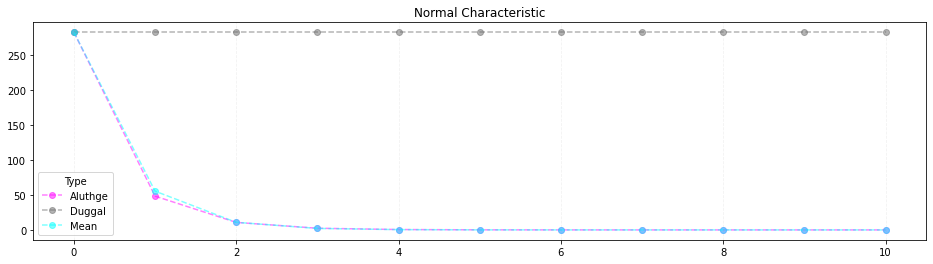

In [20]:
#(u-v,s,-s,u+v꼴)
def create_matrix(u,v,s):
    M=np.matrix([u-v,s,-s,u+v]).reshape(2,2)
    return M

T=create_matrix(2,5,10)

print(T)    

Ex_8=Transformation()

Ex_8.Transform(T,10,check_u=2)

Ex_8.Normal_calculator()

Ex_8.Normal_plot()